# The Music of the Sphere: The Planck CMB Temperature Map, and its Spherical Harmonic Decomposition

*Phil Marshall and Hans-Christian Eriksen, August 2015*

In this notebook we download the Commander Planck CMB map, visualize it, decompose it into spherical harmonics, and look at the first few components.

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%matplotlib inline
import beatbox
import healpy as hp
import os.path

## 1. The Planck CMB Temperature Map

The 2015 Planck CMB and astrophysical component maps are described on the [Planck project wiki, here](http://wiki.cosmos.esa.int/planckpla/index.php/CMB_and_astrophysical_component_maps). We use the ["COMMANDER-Ruler"](http://wiki.cosmos.esa.int/planckpla/index.php/CMB_and_astrophysical_component_maps#COMMANDER-Ruler) low resolution map, and its associated mask. This map contains the pixel values at the peak of the posterior PDF. Later, we will investigate samples drawn from this distribution: these capture the uncertainty in the Planck low resolution CMB temperature map. The FITS file containing this map is 37Mb in size, so might take a few minutes to download.

In [24]:
Tmapfile = "COM_CompMap_CMB-commrul_0256_R1.00.fits"

if not os.path.isfile(Tmapfile):
    URL = "http://pla.esac.esa.int/pla/aio/product-action?MAP.MAP_ID="+Tmapfile
    !wget -O "$Tmapfile" "$URL"

Good. Now, let's read the T map in to our "beatbox" Universe model, and take a look at it.

NSIDE = 256
ORDERING = NESTED in fits file
Ordering converted to RING


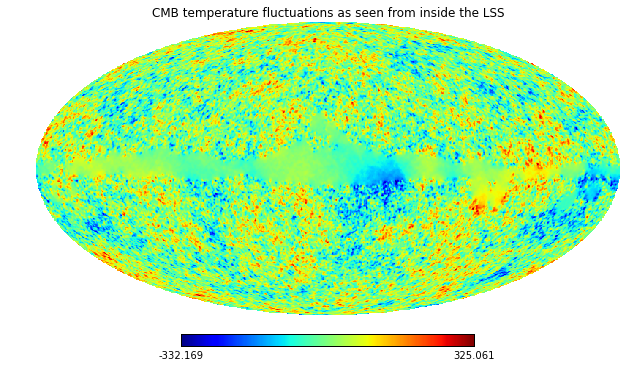

In [25]:
We = beatbox.Universe()
We.read_in_CMB_T_map(from_this=Tmapfile)
We.show_CMB_T_map(from_perspective_of="observer")

We can also try to view the map from outside, like [this](http://zonca.github.io/2013/03/interactive-3d-plot-of-sky-map.html):

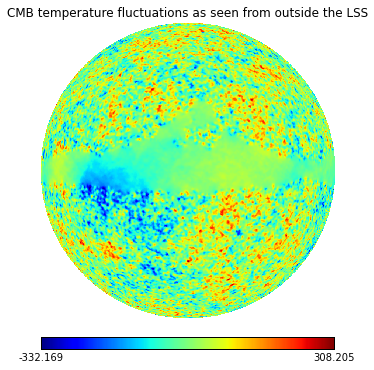

In [26]:
We.show_CMB_T_map(from_perspective_of="shiva")

## 2. Spherical harmonic decomposition

Let's see what the first few spherical harmonics look like. First we carry out the decomposition using `healpy`'s `map2alm` function - and then we can project out the components.

In [6]:
We.decompose_T_map_into_spherical_harmonics()

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


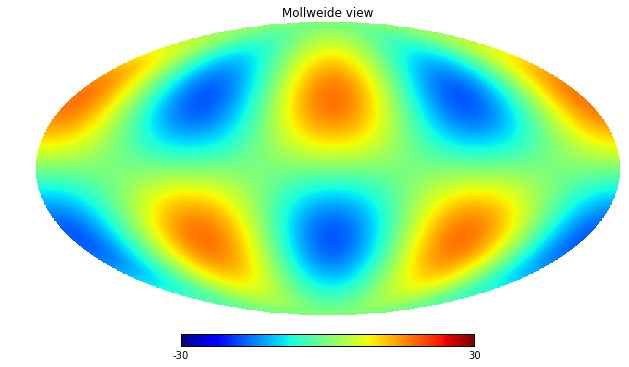

In [9]:
We.show_one_spherical_harmonic_of_CMB_T_map(l=3,m=-2,max=30)

The map we are most interested in is the one made of just the lowest few spherical harmonics: these are the ones that contain the large scale information we will need to reconstruct the gravitational potential on horizon scales.

Displaying sky map of the l =  10  and lower spherical harmonics only...
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


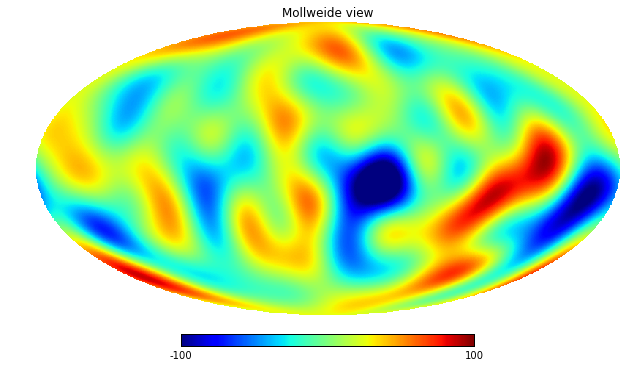

In [10]:
We.show_lowest_spherical_harmonics_of_CMB_T_map(lmax=10,max=100)

In [20]:
We.write_out_spherical_harmonic_coefficients(lmax=10)

121 alm's (lmax = 10 ) written to COM_CompMap_CMB-commrul_0256_R1.00_alm_lmax10.txt


In [21]:
!cat "COM_CompMap_CMB-commrul_0256_R1.00_alm_lmax10.txt"

#    l    m    alm_real   alm_imag
 0  0  7.66272  0
 1  -1  -5.49718  -2.66469
 1  0  3.39818  0
 1  1  5.49718  -2.66469
 2  -2  -15.4  16.9405
 2  -1  1.08694  4.76543
 2  0  23.5444  0
 2  1  -1.08694  4.76543
 2  2  -15.4  -16.9405
 3  -3  14.3845  31.2003
 3  -2  21.687  -2.67632
 3  -1  10.5506  0.649515
 3  0  -6.08199  0
 3  1  -10.5506  0.649515
 3  2  21.687  2.67632
 3  3  -14.3845  31.2003
 4  -4  1.13622  7.3743
 4  -3  -8.4382  -20.5933
 4  -2  10.3586  -4.67958
 4  -1  9.48725  9.06681
 4  0  11.6954  0
 4  1  -9.48725  9.06681
 4  2  10.3586  4.67958
 4  3  8.4382  -20.5933
 4  4  1.13622  -7.3743
 5  -5  -5.40164  18.25
 5  -4  -3.8227  -6.58538
 5  -3  -20.2528  2.87742
 5  -2  -7.79091  -2.40434
 5  -1  -22.187  2.29334
 5  0  16.1258  0
 5  1  22.187  2.29334
 5  2  -7.79091  2.40434
 5  3  20.2528  2.87742
 5  4  -3.8227  6.58538
 5  5  5.40164  18.25
 6  -6  5.97416  -11.2378
 6  -5  4.70676  -3.92218
 6  -4  11.4545  1.89007
 6  -3  8.08417  0.561562
 6  -2  10.